In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
binary_change= {
    'satisfied': 1,
    'neutral or dissatisfied': 0,
}

df['satisfaction_binary'] = df['satisfaction'].replace(binary_change)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Assuming 'df' is your DataFrame with an 'Age' column

# 1. Define the Conditions
# Each condition must be a Boolean Series (True/False)
conditions = [
    (df['Age'] < 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60) & (df['Age'] < 70),
    (df['Age'] >= 70)
]

# 2. Define the Corresponding Outputs (Labels)
choices = [
    'Minor',
    '18 to 30',
    '30 to 40',
    '40 to 50',
    '50 to 60',
    '60 to 70',
    '70 +'
]

# 3. Apply np.select()
# 'Other' is the default value if none of the conditions are True (e.g., if Age is NaN)
df['age groups'] = np.select(conditions, choices, default='Unknown')

print("Age Group creation successful.")

# Assuming 'df' is your DataFrame with an 'Age' column

# 1. Define the Conditions
# Each condition must be a Boolean Series (True/False)
conditions = [
    (df['Flight Distance'] < 750),
    (df['Flight Distance'] >= 750) & (df['Flight Distance'] < 1500),
    (df['Flight Distance'] >= 1500) & (df['Flight Distance'] < 2250),
    (df['Flight Distance'] >= 2250) & (df['Flight Distance'] < 3000),
    (df['Flight Distance'] >= 3000)
]

# 2. Define the Corresponding Outputs (Labels)
choices = [
    'Short, until 750 miles',
    'Medium-short, until 1500 miles',
    'Medium-Long, until 2250 miles',
    'Long, until 3000 miles',
    'Very long, more than 3000 miles'
]

# 3. Apply np.select()
# 'Other' is the default value if none of the conditions are True (e.g., if Age is NaN)
df['Flight Distance_group'] = np.select(conditions, choices, default='Unknown')

print("Flight distance group Group creation successful.")

Age Group creation successful.
Flight distance group Group creation successful.


C:\Users\a_gal\AppData\Local\Temp\ipykernel_21412\25427188.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction_binary'] = df['satisfaction'].replace(binary_change)


In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary,age groups,Flight Distance_group
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,4,5,5,25,18.0,neutral or dissatisfied,0,Minor,"Short, until 750 miles"
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,18 to 30,"Short, until 750 miles"
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,4,4,5,0,0.0,satisfied,1,18 to 30,"Medium-short, until 1500 miles"
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,18 to 30,"Short, until 750 miles"
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,3,3,3,0,0.0,satisfied,1,60 to 70,"Short, until 750 miles"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,4,2,3,2,3,0.0,neutral or dissatisfied,0,18 to 30,"Short, until 750 miles"
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,4,0,0.0,satisfied,1,40 to 50,"Long, until 3000 miles"
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,5,5,4,7,14.0,neutral or dissatisfied,0,30 to 40,"Medium-Long, until 2250 miles"
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,5,4,1,0,0.0,neutral or dissatisfied,0,18 to 30,"Medium-short, until 1500 miles"


In [4]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [5]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [6]:
dfSatisfied=df[df['satisfaction_binary'] == 1]
dfDisatisfied=df[df['satisfaction_binary'] == 0]

In [7]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Type of Travel',
     'Class',
     'Flight Distance',
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

# --- 2. Initialize a Dictionary to Store Results ---
results = {
    'Metric': [],
    'Mean_Satisfied': [],
    'Mean_Dissatisfied': [],
    'T_Statistic': [],
    'P_Value': [],
    'Significance (α=0.05)': []
}

# --- 3. Loop Through Columns and Perform T-Test ---
for col in metric_columns:
    # 3a. Isolate and clean data for the current column
    data_sat = dfSatisfied[col].dropna()
    data_dis = dfDisatisfied[col].dropna()

    # Skip if one of the groups has no data
    if len(data_sat) == 0 or len(data_dis) == 0:
        continue

    # 3b. Perform Welch's T-Test (equal_var=False)
    t_stat, p_value = stats.ttest_ind(
        a=data_sat,
        b=data_dis,
        equal_var=False
    )

    # 3c. Store Results
    is_significant = 'Yes (Reject H0)' if p_value <= 0.05 else 'No (Fail to Reject H0)'

    results['Metric'].append(col)
    results['Mean_Satisfied'].append(data_sat.mean())
    results['Mean_Dissatisfied'].append(data_dis.mean())
    results['T_Statistic'].append(t_stat)
    results['P_Value'].append(p_value)
    results['Significance (α=0.05)'].append(is_significant)

# --- 4. Convert Results Dictionary to a DataFrame ---
results_df = pd.DataFrame(results)

# --- 5. Print/Display Results ---
print(results_df.round(4))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
list(df)

In [ ]:
dfSatisfied.describe()

In [ ]:
dfDisatisfied.describe()

In [ ]:
dfDisatisfied_disloyal.describe()

In [ ]:
dfSatisfied

In [ ]:
dfDisatisfied

In [ ]:
numeric_cols_df = df.select_dtypes(include=np.number)

# Exclude 'id' and any other non-metric numeric columns (like Age)
metrics_to_analyze = [
    'Flight Distance',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Age' # Including age as a numeric metric to analyze
]

# Filter down to the columns that actually exist and are numeric
analysis_cols = [col for col in metrics_to_analyze if col in numeric_cols_df.columns]

# --- 2. Melt the DataFrame ---
df_melted = df.melt(
    id_vars=['satisfaction'],
    value_vars=analysis_cols,
    var_name='Metric',              # This column now holds the name of the original column
    value_name='Value'              # This column now holds the numeric data
)

# --- 3. Create the Pivot Table ---
pivot_stats = pd.pivot_table(
    df_melted,
    index=['Metric'],
    columns=['satisfaction'],       # 'satisfied' and 'unsatisfied' become columns
    values='Value',
    aggfunc=['mean', 'median', 'std'] # The desired statistics
)

# --- 4. Re-orient to Vertical View ---
# Stacking moves the first level of the column index (mean, median, std) to the rows
vertical_stats_table = pivot_stats.stack(level=0)

# Rename the new index level for clarity
vertical_stats_table.index.set_names(['Metric', 'Statistic'], inplace=True)

# Display the final vertical table
vertical_stats_table

In [8]:
# --- 1. Define the CORRECTED Palette Dictionary ---
# We use 'neutral or dissatisfied' as the key, mapped to a color.
correct_palette = {
    'satisfied': 'tab:blue',
    'neutral or dissatisfied': 'tab:orange'  # Mapped to orange, representing the non-satisfied group
}

# --- 2. Create the Grouped Bar Plot with the new palette ---
plt.figure(figsize=(16, 8))

sns.barplot(
    data=df_melted,
    x='Metric',
    y='Value',
    hue='satisfaction',
    errorbar='sd',
    palette=correct_palette # Use the corrected dictionary
)

# --- 3. Format the Chart (rest of the code) ---
plt.title('Mean of All Metrics Grouped by Satisfaction Status', fontsize=16)
plt.ylabel('Mean Value (Mixed Scales)', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df_melted' is not defined

<Figure size 1600x800 with 0 Axes>

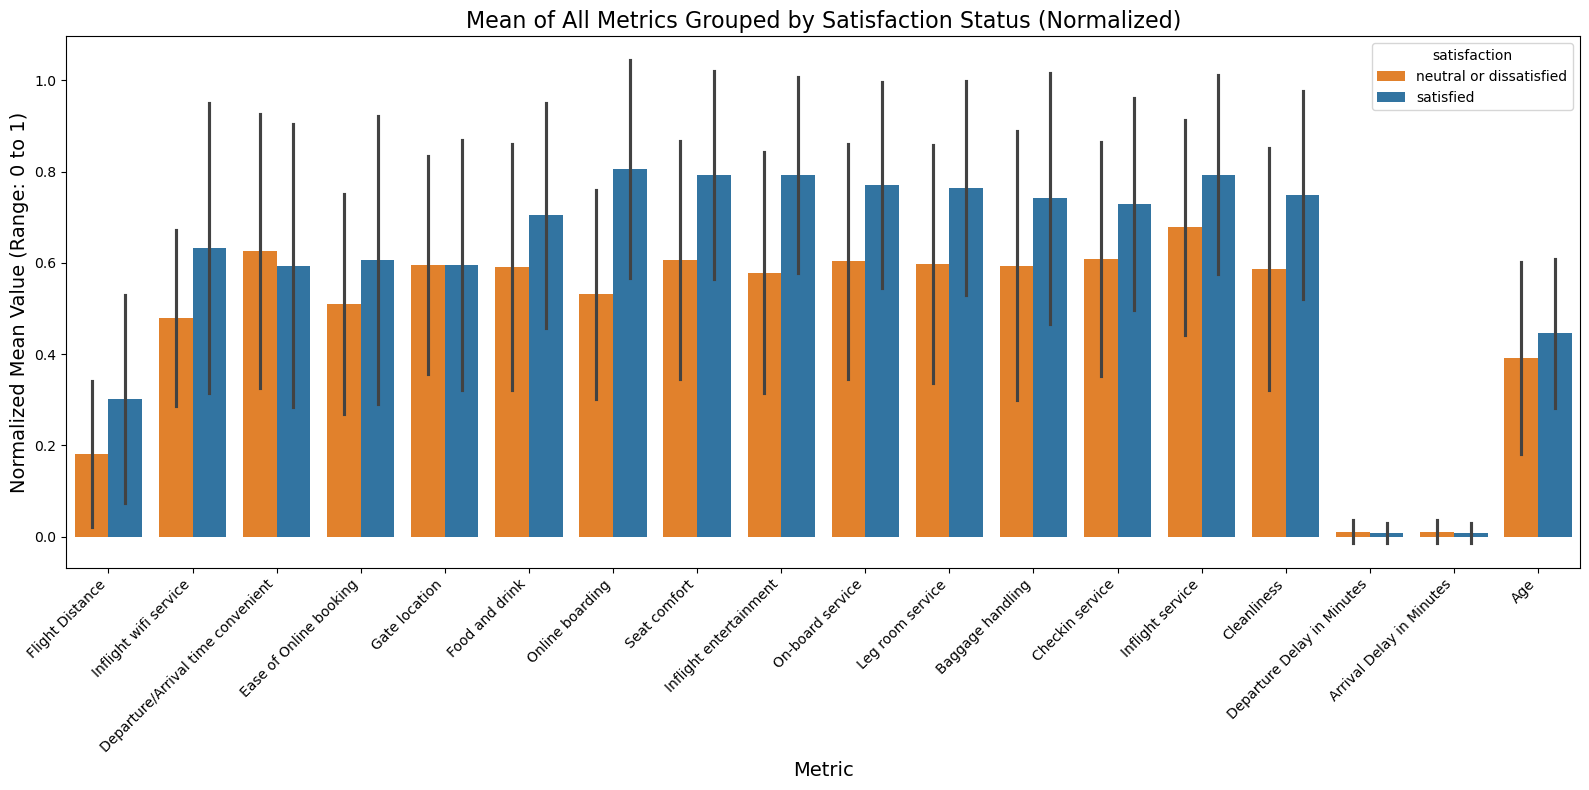

In [9]:

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame
# ----------------------------------------------------
# 1. Identify the numeric metric columns to scale
# (Excluding categorical, ID, and the 'satisfaction' column)

metrics_to_scale = [
    'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Age'
]

# Create a copy of the DataFrame columns to scale
df_scaled = df[metrics_to_scale].copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaler to all columns in the copy
df_scaled[metrics_to_scale] = scaler.fit_transform(df_scaled[metrics_to_scale])

# Merge the scaled metrics back into the original DataFrame (or a new one)
df_normalized = df[['satisfaction']].copy()
df_normalized = pd.concat([df_normalized, df_scaled], axis=1)

# ----------------------------------------------------
# 2. Melt the Scaled Data

# Use the normalized DataFrame for melting
df_melted_normalized = df_normalized.melt(
    id_vars=['satisfaction'],
    value_vars=metrics_to_scale,
    var_name='Metric',
    value_name='Normalized_Value' # New column name for the scaled values
)

# ----------------------------------------------------
# 3. Plot the Scaled Data

plt.figure(figsize=(16, 8))

correct_palette = {
    'satisfied': 'tab:blue',
    'neutral or dissatisfied': 'tab:orange'
}

sns.barplot(
    data=df_melted_normalized,
    x='Metric',
    y='Normalized_Value', # Plotting the 0-to-1 scaled values
    hue='satisfaction',
    errorbar='sd',
    palette=correct_palette
)

# --- Format the Chart ---
plt.title('Mean of All Metrics Grouped by Satisfaction Status (Normalized)', fontsize=16)
plt.ylabel('Normalized Mean Value (Range: 0 to 1)', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Assuming df_melted is already in your environment from previous steps

# --- 1. Define the List of Columns to Include (All 1-5 Scale Metrics) ---
filtered_metrics_1to5 = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
]

# --- 2. Filter the df_melted DataFrame ---
# Only keep rows where the 'Metric' is in the list above
df_melted_filtered_1to5 = df_melted[df_melted['Metric'].isin(filtered_metrics_1to5)]


# --- 3. Define the CORRECTED Palette Dictionary (as previously fixed) ---
correct_palette = {
    'satisfied': 'tab:blue',
    'neutral or dissatisfied': 'tab:orange'
}

# --- 4. Create the Grouped Bar Plot with the FILTERED data ---
plt.figure(figsize=(16, 8))

sns.barplot(
    data=df_melted_filtered_1to5, # Using the filtered data
    x='Metric',
    y='Value',
    hue='satisfaction',
    errorbar='sd',
    palette=correct_palette
)

# --- 5. Format the Chart ---
plt.title('Mean Scores for In-Flight and Check-in Metrics by Satisfaction Status', fontsize=16)
plt.ylabel('Mean Rating (1-5 Scale)', fontsize=14) # Changed Y-label for clarity
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5.5) # Set Y-axis limit appropriate for a 1-5 scale
plt.tight_layout()
plt.show()

NameError: name 'df_melted' is not defined

In [ ]:
satisfied_ratings = dfSatisfied['Inflight wifi service'].dropna()
dissatisfied_ratings = dfDisatisfied['Inflight wifi service'].dropna()

# Perform the Two-Sample T-Test (Welch's)
t_statistic, p_value = stats.ttest_ind(
    a=satisfied_ratings,
    b=dissatisfied_ratings,
    equal_var=False
)

# --- Output the Results ---
print(f"--- T-Test Results for Inflight wifi service ---")
print(f"Mean Satisfied: {satisfied_ratings.mean():.3f}")
print(f"Mean Dissatisfied: {dissatisfied_ratings.mean():.3f}")
print("-" * 38)
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.10f}")

In [ ]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    satisfied_ratings = dfDisatisfied[col].dropna()
    dissatisfied_ratings = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=satisfied_ratings,
        b=dissatisfied_ratings,
        equal_var=False
    )

    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"Mean Satisfied: {satisfied_ratings.mean():.3f}")
    print(f"Mean Dissatisfied: {dissatisfied_ratings.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

In [ ]:
df

In [ ]:
# dfSatisfied_disloyal=df[df['satisfaction_binary'] == 1 & 'Customer Type'=='disloyal Customer']
dfDisatisfied_disloyal=df[(df['satisfaction_binary'] == 0) & (df['Customer Type']=='disloyal Customer')]
dfDisloyal=df[df['Customer Type']=='disloyal Customer']

In [ ]:
dfDisatisfied_disloyal.describe()

In [ ]:
dfSatisfied['Customer Type'].value_counts()

In [ ]:
dfDisatisfied['Customer Type'].value_counts()

In [ ]:
dfDisatisfied_disloyal

In [ ]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    df_1 = dfDisatisfied[col].dropna()
    df_2 = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=df_1,
        b=df_2,
        equal_var=False
    )
    
    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1: {df_1.mean():.3f}")
    print(f"df_2: {df_2.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

In [ ]:
metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    df_1 = dfDisloyal[col].dropna()
    df_2 = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=df_1,
        b=df_2,
        equal_var=False
    )

    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1: {df_1.mean():.3f}")
    print(f"df_2: {df_2.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

In [ ]:
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

# Define the corresponding labels
legend_labels = ['Category A', 'Category B', 'Category C']

In [11]:
# --- 1. Initialize Lists for Storing Results ---
metric_names = []
p_values = []
is_significant = []
alpha = 0.05 # Significance level

# --- 2. Iterate, Test, and Collect Results ---
for col in metric_columns:
    # Safely convert to numeric and drop NaNs for both comparison groups
    # NOTE: You must have 'dfDisloyal' and 'dfDisatisfied_disloyal' defined outside this loop.
    df_1_data = pd.to_numeric(dfDisloyal[col], errors='coerce').dropna()
    df_2_data = pd.to_numeric(dfDisatisfied_disloyal[col], errors='coerce').dropna()
    
    # Skip if groups are too small or empty after cleaning
    if df_1_data.size < 2 or df_2_data.size < 2:
        print(f"Skipping {col}: Insufficient data.")
        continue

    # Perform Welch's T-Test
    t_statistic, p_value = stats.ttest_ind(
        a=df_1_data,
        b=df_2_data,
        equal_var=False
    )

    # Store results in the lists
    metric_names.append(col)
    p_values.append(p_value)
    is_significant.append(p_value <= alpha)

    # --- Output the Results (Optional, as requested) ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1 Mean: {df_1_data.mean():.3f}")
    print(f"df_2 Mean: {df_2_data.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

# --- 3. Create DataFrame for Plotting ---
p_values_df = pd.DataFrame({
    'Metric': metric_names,
    'P_Value': p_values,
    'Is_Significant': is_significant
})

# # Sort the results by P-Value for a cleaner chart
# p_values_df = p_values_df.sort_values(by='P_Value', ascending=True)

# --- 4. Plot the P-Values ---

# Define colors for bars based on significance
# --- Define the mapping dictionary ---
# Create the dictionary that maps the unique hue values (True/False) to colors
palette_map = {
    True: 'darkred',   # For bars where Is_Significant is True
    False: 'skyblue'  # For bars where Is_Significant is False
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=p_values_df,
    x='Metric',
    y='P_Value',
    hue='Is_Significant',
    palette=palette_map, # <-- FIX: Pass the dictionary here
    dodge=False,
)
# Add horizontal line at p=0.05
plt.axhline(alpha, color='green', linestyle='--', linewidth=2, label=r'$\alpha = 0.05$ Threshold')

# --- Custom Legend ---
from matplotlib.patches import Patch
custom_handles = [Patch(facecolor=c, label=l) for c, l in zip(legend_colors, legend_labels)]
significance_line = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2)
final_handles = custom_handles + [significance_line]
final_labels = legend_labels + [r'$\alpha = 0.05$ Threshold']

plt.legend(handles=final_handles, labels=final_labels, title='T-Test Result', loc='upper right')
ax.get_legend().remove() 

# --- Formatting ---
plt.title('P-Values from T-Tests for only Disloyal vs Disatisfied disloyal customers', fontsize=16)
plt.ylabel('P-Value', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

NameError: name 'dfDisloyal' is not defined

In [ ]:
# --- 1. Initialize Lists for Storing Results ---
metric_names = []
p_values = []
is_significant = []
alpha = 0.05 # Significance level

# --- 2. Iterate, Test, and Collect Results ---
for col in metric_columns:
    # Safely convert to numeric and drop NaNs for both comparison groups
    # NOTE: You must have 'dfDisloyal' and 'dfDisatisfied_disloyal' defined outside this loop.
    df_1_data = pd.to_numeric(dfDisatisfied[col], errors='coerce').dropna()
    df_2_data = pd.to_numeric(dfDisatisfied_disloyal[col], errors='coerce').dropna()
    
    # Skip if groups are too small or empty after cleaning
    if df_1_data.size < 2 or df_2_data.size < 2:
        print(f"Skipping {col}: Insufficient data.")
        continue

    # Perform Welch's T-Test
    t_statistic, p_value = stats.ttest_ind(
        a=df_1_data,
        b=df_2_data,
        equal_var=False
    )

    # Store results in the lists
    metric_names.append(col)
    p_values.append(p_value)
    is_significant.append(p_value <= alpha)

    # --- Output the Results (Optional, as requested) ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1 Mean: {df_1_data.mean():.3f}")
    print(f"df_2 Mean: {df_2_data.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

# --- 3. Create DataFrame for Plotting ---
p_values_df = pd.DataFrame({
    'Metric': metric_names,
    'P_Value': p_values,
    'Is_Significant': is_significant
})

# # Sort the results by P-Value for a cleaner chart
# p_values_df = p_values_df.sort_values(by='P_Value', ascending=True)

# --- 4. Plot the P-Values ---

# Define colors for bars based on significance
# --- Define the mapping dictionary ---
# Create the dictionary that maps the unique hue values (True/False) to colors
palette_map = {
    True: 'darkred',   # For bars where Is_Significant is True
    False: 'skyblue'  # For bars where Is_Significant is False
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=p_values_df,
    x='Metric',
    y='P_Value',
    hue='Is_Significant',
    palette=palette_map, # <-- FIX: Pass the dictionary here
    dodge=False,
)
# Add horizontal line at p=0.05
plt.axhline(alpha, color='green', linestyle='--', linewidth=2, label=r'$\alpha = 0.05$ Threshold')

# --- Custom Legend ---
from matplotlib.patches import Patch
custom_handles = [Patch(facecolor=c, label=l) for c, l in zip(legend_colors, legend_labels)]
significance_line = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2)
final_handles = custom_handles + [significance_line]
final_labels = legend_labels + [r'$\alpha = 0.05$ Threshold']

plt.legend(handles=final_handles, labels=final_labels, title='T-Test Result', loc='upper right')
ax.get_legend().remove() 

# --- Formatting ---
plt.title('P-Values from T-Tests for only Disatisfied vs Disatisfied disloyal customers', fontsize=16)
plt.ylabel('P-Value', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

In [ ]:
df['Customer Type'].value_counts()

In [ ]:
dfSatisfied['Customer Type'].value_counts()

In [ ]:
dfDisatisfied['Customer Type'].value_counts()

In [ ]:
customer_type_counts = df['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on the entire population')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')

In [ ]:
customer_type_counts = dfDisatisfied['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on Disatisfied customers')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')

In [ ]:
customer_type_counts = dfSatisfied['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on Satisfied customers')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')

In [ ]:
# Assuming 'df' is your DataFrame with an 'Age' column

# 1. Define the Conditions
# Each condition must be a Boolean Series (True/False)
conditions = [
    (df['Age'] < 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60) & (df['Age'] < 70),
    (df['Age'] >= 70)
]

# 2. Define the Corresponding Outputs (Labels)
choices = [
    'Minor',
    '18 to 30',
    '30 to 40',
    '40 to 50',
    '50 to 60',
    '60 to 70',
    '70 +'
]

# 3. Apply np.select()
# 'Other' is the default value if none of the conditions are True (e.g., if Age is NaN)
df['age groups'] = np.select(conditions, choices, default='Unknown')

print("Age Group creation successful.")

# Assuming 'df' is your DataFrame with an 'Age' column

# 1. Define the Conditions
# Each condition must be a Boolean Series (True/False)
conditions = [
    (df['Flight Distance'] < 750),
    (df['Flight Distance'] >= 750) & (df['Flight Distance'] < 1500),
    (df['Flight Distance'] >= 1500) & (df['Flight Distance'] < 2250),
    (df['Flight Distance'] >= 2250) & (df['Flight Distance'] < 3000),
    (df['Flight Distance'] >= 3000)
]

# 2. Define the Corresponding Outputs (Labels)
choices = [
    'Short, until 750 miles',
    'Medium-short, until 1500 miles',
    'Medium-Long, until 2250 miles',
    'Long, until 3000 miles',
    'Very long, more than 3000 miles'
]

# 3. Apply np.select()
# 'Other' is the default value if none of the conditions are True (e.g., if Age is NaN)
df['Flight Distance_group'] = np.select(conditions, choices, default='Unknown')

print("Flight distance group Group creation successful.")

In [ ]:
# Assuming 'df' is your DataFrame with an 'Age' column

# 1. Define the Conditions
# Each condition must be a Boolean Series (True/False)
conditions = [
    (df['Flight Distance'] < 750),
    (df['Flight Distance'] >= 750) & (df['Flight Distance'] < 1500),
    (df['Flight Distance'] >= 1500) & (df['Flight Distance'] < 2250),
    (df['Flight Distance'] >= 2250) & (df['Flight Distance'] < 3000),
    (df['Flight Distance'] >= 3000)
]

# 2. Define the Corresponding Outputs (Labels)
choices = [
    'Short, until 750 miles',
    'Medium-short, until 1500 miles',
    'Medium-Long, until 2250 miles',
    'Long, until 3000 miles',
    'Very long, more than 3000 miles'
]

# 3. Apply np.select()
# 'Other' is the default value if none of the conditions are True (e.g., if Age is NaN)
df['Flight Distance_group'] = np.select(conditions, choices, default='Unknown')

print("Flight distance group Group creation successful.")

In [ ]:
df['Flight Distance'].describe()

In [ ]:
df['Flight Distance_group'].describe()

In [ ]:
df

In [ ]:
df['age groups'].value_counts()

In [ ]:
df['age Groups']

In [ ]:
dfDisatisfied.value_counts()

In [ ]:
dfDisatisfied

In [ ]:
# # Data provided by the user (Age Group counts from dfDisatisfied)
# # In a real scenario, this data would come from: dfDisatisfied['age groups'].value_counts()
# data_age_groups = {
#     'Age Group': ['40 to 50', '18 to 30', '30 to 40', '50 to 60', '60 to 70', 'Minor', '70 +'],
#     'Count': [23696, 22796, 20659, 19103, 8346, 7931, 1373]
# }
# df_counts = pd.DataFrame(data_age_groups)

# # 1. Calculate the total number of dissatisfied customers
# total_customers = df_counts['Count'].sum()

# # 2. Calculate the percentage for each age group
# df_counts['Percentage'] = (df_counts['Count'] / total_customers) * 100

# # 3. Define the logical order for the age groups for plotting
# age_order = ['Minor', '18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 +']

# # 4. Plot a bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x='Age Group',
#     y='Percentage',
#     data=df_counts,
#     order=age_order,  # Use the defined order for chronological display
#     palette='viridis'
# )

# # Add titles and labels
# plt.title('Percentage of Dissatisfied Customers by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
# plt.grid(axis='y', linestyle='--')
# plt.tight_layout()

# # Display or save the plot
# plt.show() # Use plt.show() if running in a script/local environment
# # plt.savefig('dissatisfied_customers_age_percentage_bar_chart_actual.png')

C:\Users\a_gal\AppData\Local\Temp\ipykernel_21412\783172777.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


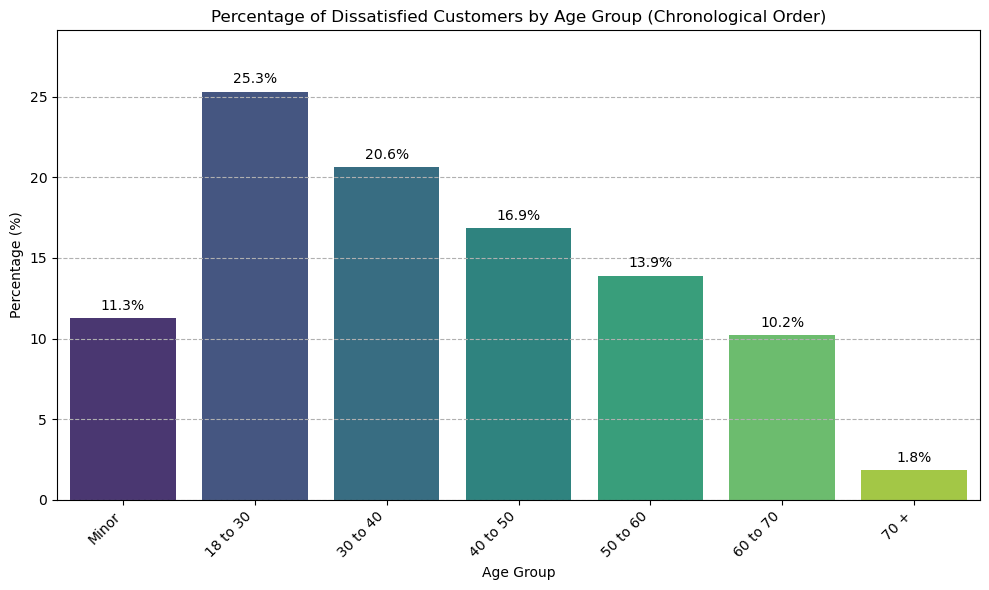

In [12]:
# --- 1. AUTOMATIC DATA AGGREGATION ---
# Get the count of each age group from the dfDisatisfied DataFrame
age_group_counts_series = dfDisatisfied['age groups'].value_counts()

# Convert the Series of counts into a DataFrame (df_counts) for plotting
df_counts = age_group_counts_series.reset_index()
df_counts.columns = ['Age Group', 'Count']


# --- 2. CALCULATE PERCENTAGE ---
total_customers = df_counts['Count'].sum()
df_counts['Percentage'] = (df_counts['Count'] / total_customers) * 100

# Optional: Ensure all groups are present, even if count is 0,
# and ensure they are properly ordered by the chronological order of ages.
# We will use the 'order' parameter in sns.barplot for this.
age_order = ['Minor', '18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 +']


# --- 3. PLOT BAR CHART ---
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Age Group',
    y='Percentage',
    data=df_counts,
    order=age_order,       # Use the defined chronological order
    palette='viridis'
)

# Add titles and labels
plt.title('Percentage of Dissatisfied Customers by Age Group (Chronological Order)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage values on top of the bars (Annotations)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adjust y-limit for the annotations
plt.ylim(0, df_counts['Percentage'].max() * 1.15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save the plot
plt.savefig('dissatisfied_customers_age_percentage_bar_chart_actual.png')
plt.show() # Use plt.show() if running in a script/local environment

In [ ]:
# --- 1. AUTOMATIC DATA AGGREGATION ---
# Get the count of each Gender from the dfDisatisfied DataFrame
gender_counts_series = dfDisatisfied['Gender'].value_counts()

# Convert the Series of counts into a DataFrame (df_counts)
df_counts = gender_counts_series.reset_index()
df_counts.columns = ['Gender', 'Count']

# Sort the data by count (or percentage) before plotting
df_counts = df_counts.sort_values(by='Count', ascending=False)


# --- 2. CALCULATE PERCENTAGE ---
total_customers = df_counts['Count'].sum()
df_counts['Percentage'] = (df_counts['Count'] / total_customers) * 100


# --- 3. PLOT BAR CHART ---
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    x='Gender',
    y='Percentage',
    data=df_counts,
    # Order is naturally handled by the prior sorting of df_counts
    palette='Set2' # Used a different palette (Set2)
)

# Add titles and labels
plt.title('Percentage of Dissatisfied Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0, ha='center') # No rotation needed

# Add percentage values on top of the bars (Annotations)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adjust y-limit for the annotations
plt.ylim(0, df_counts['Percentage'].max() * 1.15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save the plot
plt.savefig('dissatisfied_customers_gender_percentage_bar_chart.png')

In [ ]:
dfDisatisfied['Flight Distance'].describe()

In [ ]:
df['Flight Distance_group'].describe() 

In [ ]:
# --- 1. AUTOMATIC DATA AGGREGATION ---
# Get the count of each Flight Distance group from the dfDisatisfied DataFrame
distance_group_counts_series = dfDisatisfied['Flight Distance_group'].value_counts(dropna=False)

# Convert the Series of counts into a DataFrame (df_counts)
df_counts = distance_group_counts_series.reset_index()
df_counts.columns = ['Flight Distance Group', 'Count']

# Define the chronological/logical order for the x-axis
distance_labels = ['Short-Haul (0-500)', 'Medium-Haul (500-1500)', 'Long-Haul (1500-3000)', 'Ultra-Long (3000+)']

# --- 2. CALCULATE PERCENTAGE ---
total_customers = df_counts['Count'].sum()
df_counts['Percentage'] = (df_counts['Count'] / total_customers) * 100


# --- 3. PLOT BAR CHART ---
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Flight Distance Group',
    y='Percentage',
    data=df_counts,
    order=distance_labels, # Enforce chronological order
    palette='magma'
)

# Add titles and labels
plt.title('Percentage of Dissatisfied Customers by Flight Distance Group')
plt.xlabel('Flight Distance Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=15, ha='right') # Slight rotation for readability

# Add percentage values on top of the bars (Annotations)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adjust y-limit for the annotations
plt.ylim(0, df_counts['Percentage'].max() * 1.15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('dissatisfied_customers_flight_distance_percentage_bar_chart.png')

In [ ]:
# --- 1. DEFINE AND APPLY CUSTOM GROUPS (using the logic you provided) ---

# --- Define the Conditions ---
# Assuming you are applying this logic to the dfDisatisfied DataFrame
conditions = [
    (dfDisatisfied['Flight Distance'] < 750),
    (dfDisatisfied['Flight Distance'] >= 750) & (dfDisatisfied['Flight Distance'] < 1500),
    (dfDisatisfied['Flight Distance'] >= 1500) & (dfDisatisfied['Flight Distance'] < 2250),
    (dfDisatisfied['Flight Distance'] >= 2250) & (dfDisatisfied['Flight Distance'] < 3000),
    (dfDisatisfied['Flight Distance'] >= 3000)
]

# --- Define the Corresponding Labels and Order ---
distance_labels = [
    'Short, until 750 miles',
    'Medium-short, until 1500 miles',
    'Medium-Long, until 2250 miles',
    'Long, until 3000 miles',
    'Very long, more than 3000 miles'
]

# Apply np.select() to create the grouping column
dfDisatisfied['Flight Distance_group'] = np.select(
    conditions, 
    distance_labels, 
    default='Unknown'
)

# --- 2. AUTOMATIC DATA AGGREGATION & PERCENTAGE CALCULATION ---

# Get the count of each Flight Distance group
distance_group_counts_series = dfDisatisfied['Flight Distance_group'].value_counts(dropna=False)

# Convert the Series of counts into a DataFrame (df_counts)
df_counts = distance_group_counts_series.reset_index()
df_counts.columns = ['Flight Distance Group', 'Count']

# Calculate Percentage
total_customers = df_counts['Count'].sum()
df_counts['Percentage'] = (df_counts['Count'] / total_customers) * 100


# --- 3. PLOT BAR CHART WITH ANNOTATIONS ---
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Flight Distance Group',
    y='Percentage',
    data=df_counts,
    order=distance_labels, # Ensures the groups plot in logical order
    palette='magma'
)

# Add titles and labels
plt.title('Percentage of Dissatisfied Customers by Flight Distance Group')
plt.xlabel('Flight Distance Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=15, ha='right') # Slight rotation for readability

# Add percentage values on top of the bars (Annotations)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adjust y-limit to ensure annotations are visible
plt.ylim(0, df_counts['Percentage'].max() * 1.20)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save the plot
plt.savefig('dissatisfied_customers_flight_distance_percentage_bar_chart_final.png')
plt.show()